In [93]:
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr


In [94]:
def counting_sort(arr):
    max_element = max(arr) #k
    count_array = [0] * (max_element + 1) #primo for

    for element in arr:
        count_array[element] += 1

    for i in range(1, len(count_array)):
        count_array[i] += count_array[i-1]

    sorted_array = [0] * len(arr)
    for element in reversed(arr):
        sorted_array[count_array[element]-1] = element #-1 perché indicizzazione parte da 0
        count_array[element] -= 1

    return sorted_array


In [95]:
import random
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import numpy as np

def test(rand, N, r, s, ins, cou, rev = False):

    insertion_sort_times = []
    counting_sort_times = []


    i=s

    while i<N:
        if rand:
            arr = [random.randint(0, r) for _ in range(i)]
        else:
            arr = np.arange(i)
        if rev:
            arr = arr[::-1]

        arr2 = np.copy(arr)

        start = timer()
        insertion_sort(arr) #probably not necessary
        end = timer()
        insertion_sort_times.append(end-start)

        media_list = []
        for x in range(200):
            start = timer()
            counting_sort(arr2)
            end = timer()
            media_list.append(end-start)

        counting_sort_times.append(np.mean(media_list))
    
        i+=s

    if ins:
        plt.plot(range(s,N,s), insertion_sort_times, label="Insertion Sort")
    if cou:
        plt.plot(range(s,N,s), counting_sort_times, label="Counting Sort")
    plt.xlabel("Input Size")
    plt.ylabel("Time (seconds)")
    plt.title("Insertion Sort vs Counting Sort")
    plt.legend()
    plt.show()


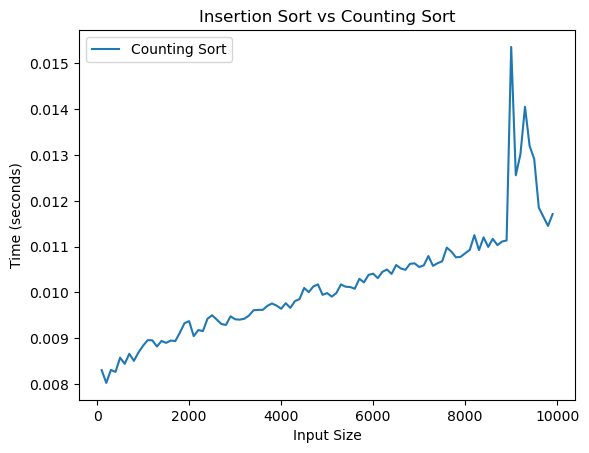

In [96]:
test(True, 10000, 100000, 100, False, True)